# Graph based interest representation
1. User-(rating)-title
2. From U-T, generate a T-T similarity graph

# Related Work
1. [MMBee: Live Streaming Gift-Sending Recommendations via
Multi-Modal Fusion and Behaviour Expansion](<../../Deng 2024 - MMBee.pdf>)

# Data Set files
1. AnimeList.csv contains list of anime, with title, title synonyms, genre, studio, licencor, producer, duration, rating, score, airing date, episodes, source (manga, light novel etc.) and many other important data about individual anime providing sufficient information about trends in time about important aspects of anime. Rank is in float format in csv, but it contains only integer value. This is due to NaN values and their representation in pandas.
2. UserList.csv contains information about users who watch anime, namely username, registration date (join_date), last online date, birth date, gender, location, and lots of aggregated values from their anime lists.
3. UserAnimeList.csv contains anime lists of all users. Per each record, here is username, anime ID, score, status and timestamp when was this record last updated.

# Sources
1. Dataset https://www.kaggle.com/datasets/azathoth42/myanimelist/data
2. Graph Based interest expansion, Multimodal diffusion

In [13]:
import matplotlib.pyplot as plt;
import seaborn as sns;
from matplotlib.colors import LogNorm, Normalize,NoNorm;
# sns.set_theme(rc={'figure.figsize':(10,10)})
import pandas as pd;
from sklearn.preprocessing import MultiLabelBinarizer;
from sklearn import set_config
set_config(transform_output='pandas');
import os
path_to_data_folder = '/home/sooth/Documents/Beta/80-89 Second Degree/81 Courses/01 CAP5771 - DM TM/04  DM Project/01_Dataset/';

In [14]:
def load_titles()->pd.DataFrame:
    frame:pd.DataFrame =  pd.read_csv(path_to_data_folder + '03 AnimeList.csv')
    # DROP BAD ROWS
    frame.drop(index=frame[frame['status']!='Finished Airing'].index, inplace=True)
    frame.drop(index=frame[frame['popularity']==0].index, inplace=True) # Popularity cannot be 0.
    frame.drop(index=frame[frame['rank']==0].index, inplace=True) # Rank cannot be 0.
    frame.dropna(subset=['rank','popularity','genre'],axis=0,inplace=True)
    
    # ADD CALCULATED COLUMNS
    frame['fav_per_member'] = frame['favorites']/frame['members']
    
    frame['genre'] = frame['genre'].str.split(', ')
    mlb_genre:MultiLabelBinarizer = MultiLabelBinarizer()
    binary_genre_arr = mlb_genre.fit_transform(frame['genre'])
    pd_binary_genres = pd.DataFrame(binary_genre_arr,index=frame['genre'].index, columns=mlb_genre.classes_)
    print(frame.shape)
    frame = pd.concat([frame, pd_binary_genres],axis=1)
    # DROP UNUSED COLUMNS
    frame.drop(columns=['image_url','opening_theme','ending_theme', 'airing',
                 'aired', 'aired_string', 'background', 'premiered', 'status',
                 'producer', 'licensor', 'studio', 'title_synonyms', 'rating',
                 'title_english', 'title_japanese', 'source', 'duration', 'favorites',
                 'genre',
                 'broadcast', 'related'], inplace=True)
    return frame;

# def load_userlist()->pd.DataFrame:
#     return pd.read_csv(path_to_data_folder + 'UserList.csv');
# def load_user()->pd.DataFrame:
#     return pd.read_csv(path_to_data_folder + 'UserList.csv');

In [15]:
td:pd.DataFrame = load_titles();

(12534, 32)


In [16]:
print(td.head())

   anime_id                title type  episodes  score  scored_by    rank  \
0     11013        Inu x Boku SS   TV        12   7.63     139250  1274.0   
1      2104     Seto no Hanayome   TV        26   7.89      91206   727.0   
2      5262   Shugo Chara!! Doki   TV        51   7.55      37129  1508.0   
3       721        Princess Tutu   TV        38   8.21      36501   307.0   
4     12365  Bakuman. 3rd Season   TV        25   8.67     107767    50.0   

   popularity  members  fav_per_member  ...  Shoujo Ai  Shounen  Shounen Ai  \
0         231   283882        0.009895  ...          0        1           0   
1         366   204003        0.012642  ...          0        1           0   
2        1173    70127        0.011436  ...          0        0           0   
3         916    93312        0.035837  ...          0        0           0   
4         426   182765        0.011392  ...          0        1           0   

   Slice of Life  Space  Sports  Super Power  Supernatural  Th

In [17]:
td.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12534 entries, 0 to 14477
Data columns (total 50 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   anime_id        12534 non-null  int64  
 1   title           12534 non-null  object 
 2   type            12534 non-null  object 
 3   episodes        12534 non-null  int64  
 4   score           12534 non-null  float64
 5   scored_by       12534 non-null  int64  
 6   rank            12534 non-null  float64
 7   popularity      12534 non-null  int64  
 8   members         12534 non-null  int64  
 9   fav_per_member  12534 non-null  float64
 10  Action          12534 non-null  int64  
 11  Adventure       12534 non-null  int64  
 12  Cars            12534 non-null  int64  
 13  Comedy          12534 non-null  int64  
 14  Dementia        12534 non-null  int64  
 15  Demons          12534 non-null  int64  
 16  Drama           12534 non-null  int64  
 17  Ecchi           12534 non-null  int6

In [18]:
title_corr = td.corr(numeric_only=True)
title_corr['rank'].sort_values()

score            -0.808407
fav_per_member   -0.418472
members          -0.402862
scored_by        -0.365523
Shounen          -0.267895
Action           -0.243744
Romance          -0.243400
School           -0.196624
Supernatural     -0.188809
Drama            -0.172130
Mystery          -0.171042
Sci-Fi           -0.152024
Comedy           -0.151769
Adventure        -0.129169
Seinen           -0.128874
Military         -0.124527
Magic            -0.120221
Shoujo           -0.118495
Harem            -0.109431
Psychological    -0.100252
Super Power      -0.099673
Mecha            -0.095301
Ecchi            -0.087115
Fantasy          -0.085156
Police           -0.080368
Slice of Life    -0.077734
Thriller         -0.069864
Josei            -0.067680
Vampire          -0.064152
Space            -0.063829
Demons           -0.063057
Sports           -0.062889
episodes         -0.059695
Shoujo Ai        -0.048296
Martial Arts     -0.048185
Shounen Ai       -0.044982
Game             -0.031735
S

In [ ]:
# from pandas.plotting import scatter_matrix;
# attributes = ['rank', 'members', 'popularity','score', 'fav_per_member'];
# scatter_matrix(td[attributes],figsize=(12,8))

In [19]:
td.sort_values(by=['rank','score'],ascending=[True,False])

,anime_id,title,type,episodes,score,scored_by,rank,popularity,members,fav_per_member,...,Shoujo Ai,Shounen,Shounen Ai,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Vampire
2555,5114,Fullmetal Alchemist: Brotherhood,TV,64,9.25,733592,1.0,4,1199091,0.089147,...,0,1,0,0,0,0,0,0,0,0
1028,32281,Kimi no Na wa.,Movie,1,9.19,471398,2.0,33,730076,0.047820,...,0,0,0,0,0,0,0,1,0,0
1252,28977,Gintama°,TV,51,9.15,71751,3.0,383,198744,0.028519,...,0,1,0,0,0,0,0,0,0,0
2999,9253,Steins;Gate,TV,24,9.14,563857,5.0,8,1010330,0.091478,...,0,0,0,0,0,0,0,0,1,0
12724,820,Ginga Eiyuu Densetsu,OVA,110,9.11,29036,6.0,671,124993,0.068540,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14348,35094,Zou no Hanako,OVA,1,3.67,3,12912.0,14103,47,0.000000,...,0,0,0,0,0,0,0,0,0,0
14423,35100,Zukkoke Sannin-gumi no Bousai Kyoushitsu,OVA,1,5.00,5,12915.0,14104,47,0.000000,...,0,0,0,0,0,0,0,0,0,0
14325,35099,Zukkoke Sannin-gumi no Jitensha Kyoushitsu,OVA,1,5.29,7,12917.0,14074,49,0.000000,...,0,0,0,0,0,0,0,0,0,0
14437,35149,Zukkoke Sannin-gumi no Koutsuu Anzen,OVA,1,3.25,4,12918.0,14105,47,0.000000,...,0,0,0,0,0,0,0,0,0,0


How to make a Genre X Genre table to indicate how many times a genre is coupled with another genre.
1. Get genre columns
2. Duplicate into a transpose
3. Add matrices? dot-prod?

In [ ]:
genres:pd.DataFrame = td.iloc[:,-32:]
genres.shape

(12534, 32)

In [ ]:
GenreAdjacency:pd.DataFrame = genres.transpose().dot(genres)
print(GenreAdjacency)

               Fantasy  Game  Harem  Historical  Horror  Josei  Kids  Magic  \
Fantasy           2484    87     65         179      78     18   569    491   
Game                87   260      1           3       2      2    30     18   
Harem               65     1    305           5       0      2     0     39   
Historical         179     3      5         907      18     18   127     35   
Horror              78     2      0          18     361      1    10     16   
Josei               18     2      2          18       1     76     0      1   
Kids               569    30      0         127      10      0  1934     81   
Magic              491    18     39          35      16      1    81    848   
Martial Arts        63     3      8          55       8      0     8     13   
Mecha               72    15     21          18      10      0    29     23   
Military            46     3      2          46      15      2     4     21   
Music               85     6     15          15     

In [ ]:
GenreAdjacency.max().sort_values(ascending=False)

Fantasy          2484
Sci-Fi           2142
Kids             1934
Shounen          1704
Romance          1517
Slice of Life    1428
Music            1292
School           1269
Supernatural     1080
Mecha             966
Historical        907
Magic             848
Seinen            652
Shoujo            622
Sports            592
Mystery           571
Super Power       499
Parody            494
Military          456
Space             416
Horror            361
Harem             305
Martial Arts      284
Psychological     266
Game              260
Police            206
Samurai           166
Vampire           115
Thriller           93
Josei              76
Shounen Ai         72
Shoujo Ai          60
dtype: int64

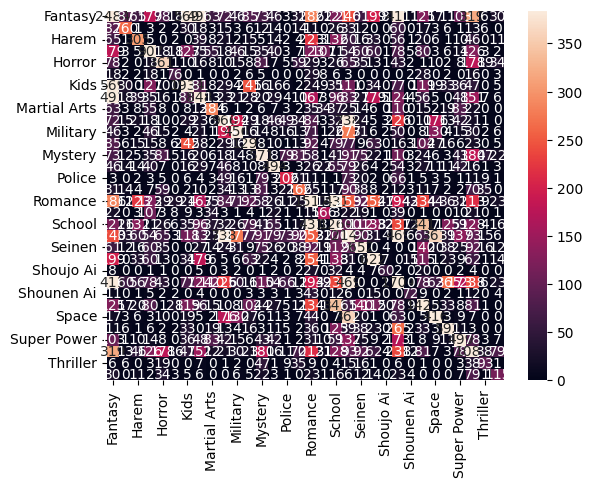

In [ ]:
# sns.set_theme(rc={'figure.figsize':(32,32)})
sns.heatmap(GenreAdjacency, norm=Normalize(vmax=768/2), annot=True, fmt='.0f')
plt.show()

In [ ]:
title_corr.iloc[8:, 8:].describe()

# sns.heatmap(title_corr.iloc[8:, 8:], norm=LogNorm(),annot=True)
# plt.show()

,Action,Adventure,Cars,Comedy,Dementia,Demons,Drama,Ecchi,Fantasy,Game,...,Shoujo Ai,Shounen,Shounen Ai,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Vampire
count,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,...,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000
mean,0.062676,0.030384,0.021135,0.014610,0.000990,0.041997,0.035061,0.037835,0.022218,0.018468,...,0.025799,0.045209,0.025722,-0.002656,0.030997,0.008736,0.035192,0.056304,0.034201,0.037009
std,0.187226,0.177450,0.161810,0.182378,0.165376,0.165450,0.169060,0.173867,0.178370,0.160988,...,0.160055,0.174116,0.160253,0.175118,0.180611,0.169571,0.167364,0.173786,0.165812,0.162877
min,-0.182418,-0.146134,-0.047857,-0.207523,-0.096245,-0.054509,-0.164490,-0.097820,-0.112590,-0.045285,...,-0.031444,-0.122222,-0.032467,-0.182418,-0.080250,-0.100313,-0.062741,-0.094169,-0.050746,-0.034506
25%,-0.014340,-0.040593,-0.019586,-0.080434,-0.042129,-0.018583,-0.018797,-0.021952,-0.053366,-0.018938,...,-0.010884,-0.024705,-0.014255,-0.059066,-0.029486,-0.041639,-0.024213,-0.018560,-0.017023,-0.014672
50%,0.035396,-0.003127,-0.011596,-0.015733,-0.023292,0.009696,0.008736,-0.008207,-0.010133,-0.012534,...,-0.005964,0.018079,-0.005886,-0.037051,-0.016622,-0.024986,-0.002819,0.019695,-0.006811,0.003175
75%,0.109611,0.044521,-0.002698,0.036647,-0.012808,0.039186,0.045466,0.031703,0.022051,0.003917,...,0.004391,0.071081,0.004682,-0.016016,-0.005557,-0.007518,0.032944,0.075058,0.012868,0.023679
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
from sklearn.cluster import KMeans;
from sklearn.decomposition import PCA;
model = KMeans();

In [ ]:
cluster_data = pd.concat([td['members'], td['fav_per_member'], td['score']], axis=1)
cluster_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12534 entries, 0 to 14477
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   members         12534 non-null  int64  
 1   fav_per_member  12534 non-null  float64
 2   score           12534 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 391.7 KB


In [ ]:
print(cluster_data.iloc[:,0:2])

       members  fav_per_member
0       283882        0.009895
1       204003        0.012642
2        70127        0.011436
3        93312        0.035837
4       182765        0.011392
...        ...             ...
14472       40        0.000000
14473       76        0.000000
14474       90        0.000000
14476       32        0.000000
14477      476        0.000000

[12534 rows x 2 columns]


In [ ]:
model.fit_transform(X=cluster_data.iloc[:,0:2],y=cluster_data.iloc[2])
cluster_data['pred_score'] = model.predict(cluster_data.iloc[:,0:2])

<Axes: xlabel='score', ylabel='members'>

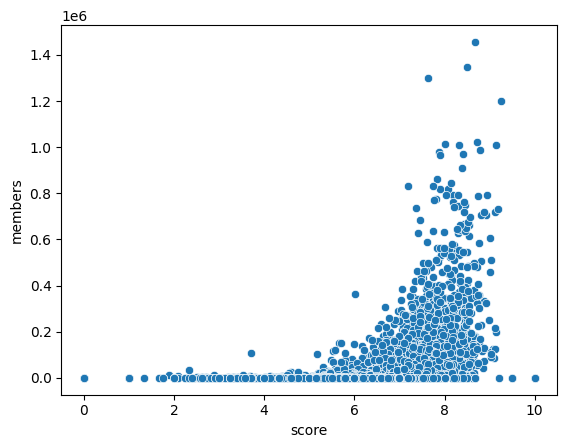

In [ ]:
sns.scatterplot(cluster_data,x='score',y='members')